In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

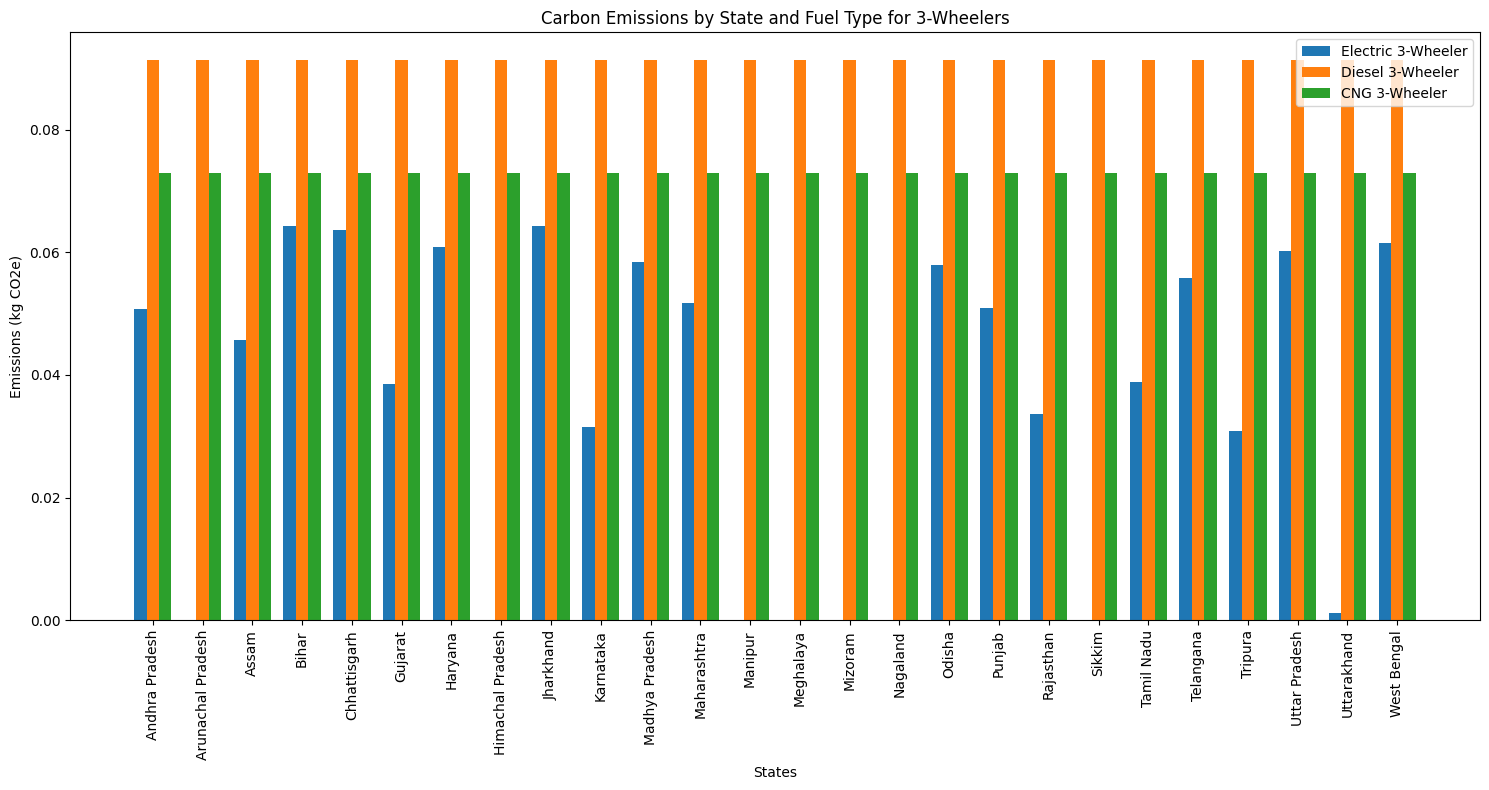

In [14]:
# Step 1: Read the three_wheelers.csv file
three_wheelers_df = pd.read_csv('C:/Users/SHREYAS/Downloads/three_wheelers.csv')
electric_mileage = three_wheelers_df['Avg Electric Mileage (km/kWh)'].values[0]
diesel_mileage = three_wheelers_df['Avg Diesel Mileage (km/l)'].values[0]
cng_mileage = three_wheelers_df['Avg CNG Mileage (km/kg)'].values[0]

# Step 2: Read the FuelEFs.csv file
fuel_efs_df = pd.read_csv('C:/Users/SHREYAS/Downloads/FuelEFs.csv')
diesel_ef = fuel_efs_df[fuel_efs_df['Fuel'] == 'Diesel']['EF'].values[0]
cng_ef = fuel_efs_df[fuel_efs_df['Fuel'] == 'CNG']['EF'].values[0]

# Initialize lists to store emissions data
electric_emissions = []
diesel_emissions = []
cng_emissions = []

# Step 3: For each state, read the corresponding {state}.csv file and calculate emissions
for state in states:
        state_df = pd.read_csv(f'C:/College/Emission Factors/Emission Factors/{state}.csv')
        state_ef = state_df[state_df['Year'] == '2023-24']['EF'].values[0]
        
        # Calculate emissions
        electric_emission = state_ef / electric_mileage
        diesel_emission = diesel_ef / diesel_mileage
        cng_emission = cng_ef / cng_mileage
        
        electric_emissions.append(electric_emission)
        diesel_emissions.append(diesel_emission)
        cng_emissions.append(cng_emission)

# Step 4: Plot the bar graph
x = np.arange(len(states))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, electric_emissions, width, label='Electric 3-Wheeler')
rects2 = ax.bar(x, diesel_emissions, width, label='Diesel 3-Wheeler')
rects3 = ax.bar(x + width, cng_emissions, width, label='CNG 3-Wheeler')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_ylabel('Emissions (kg CO2e)')
ax.set_title('Carbon Emissions by State and Fuel Type for 3-Wheelers')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()
